In [30]:
from qiskit import QuantumCircuit, assemble, Aer
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [31]:
#representing multi qubits.
qc = QuantumCircuit(3)
for qubit in range(3):
    qc.h(qubit)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [32]:
qc.save_statevector()
qobj = assemble(qc)
sim = Aer.get_backend('aer_simulator')

In [33]:
result = sim.run(qobj).result()

/var/folders/zp/ml21rpn93ld15w6gxd9g29j80000gn/T/ipykernel_22617/1847723949.py:1: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result()


In [34]:
state = result.get_statevector()
counts = result.get_counts()

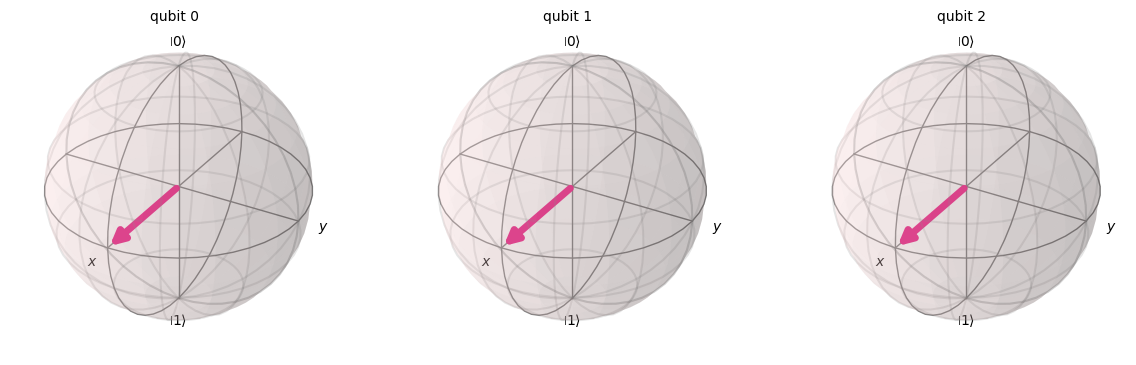

In [35]:
plot_bloch_multivector(state)

In [36]:
from qiskit.visualization import array_to_latex
array_to_latex(state, prefix = "\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [37]:
# single qubit on a multiqubit statevector.
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [38]:
qc.save_unitary()
qobj  = assemble(qc)
result = sim.run(qobj).result().get_unitary()
array_to_latex(result, prefix = "\\text{Circuit = }")

/var/folders/zp/ml21rpn93ld15w6gxd9g29j80000gn/T/ipykernel_22617/3218189851.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result().get_unitary()


<IPython.core.display.Latex object>

In [39]:
# Multi Qubit gates.

In [40]:
#CNOT gate 
qc = QuantumCircuit(2)
qc.h(0) ## this will lead to entangled state
qc.cx(0,1)
qc.draw()


┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [41]:
qc.save_statevector()
qobj = assemble(qc)
final_state = sim.run(qobj).result().get_statevector()

/var/folders/zp/ml21rpn93ld15w6gxd9g29j80000gn/T/ipykernel_22617/582598488.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  final_state = sim.run(qobj).result().get_statevector()


In [42]:
array_to_latex(final_state, prefix= "\\text{Statevector = }")

<IPython.core.display.Latex object>

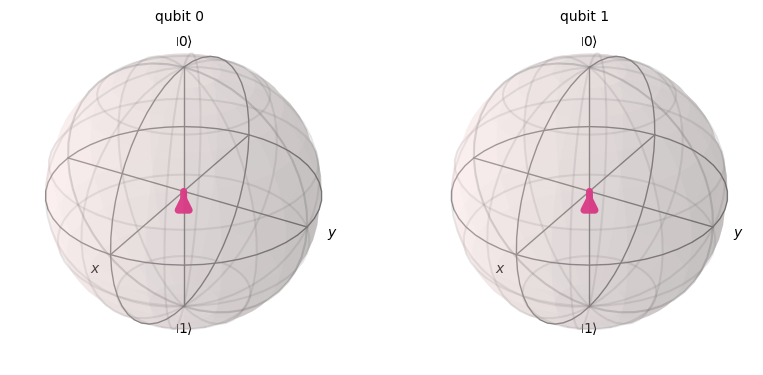

In [43]:
plot_bloch_multivector(final_state)

/var/folders/zp/ml21rpn93ld15w6gxd9g29j80000gn/T/ipykernel_22617/4025330123.py:1: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  plot_histogram(sim.run(qobj).result().get_counts())


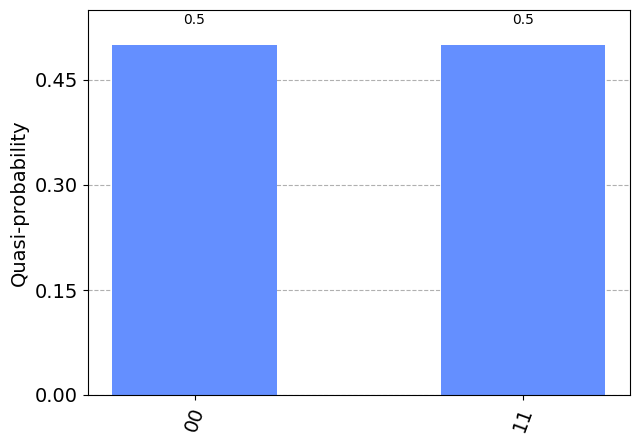

In [45]:
plot_histogram(sim.run(qobj).result().get_counts())